# Sit 741 distinction Task 1

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
#load dataset
df = pd.read_csv('diabetes_dataset.csv')
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [3]:
df.duplicated().sum()

14

In [4]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [5]:
#summary
df.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000
mean,2018.360731,41.885930,0.202238,0.200098,0.198758,0.198898,0.200008,0.074860,0.039426,27.320767,5.527517,138.059518,0.085012
std,1.345312,22.516409,0.401671,0.400075,0.399067,0.399173,0.400008,0.263167,0.194606,6.637248,1.070674,40.708667,0.278901
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


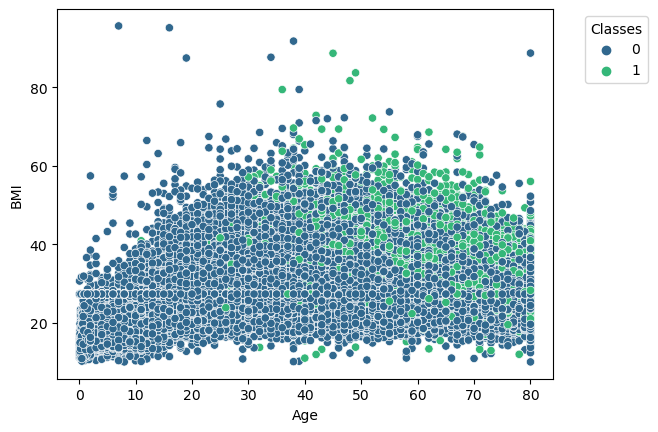

In [6]:
#scatter plot of targets for age vs bmi
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df.iloc[:,2],y=df.iloc[:,-4],hue = df.diabetes, data=df, palette='viridis')
plt.legend(title='Classes',bbox_to_anchor=(1.05,1),loc='upper left')
plt.xlabel('Age')
plt.ylabel('BMI');

Doesn't appear to be a clear linear patter for diabetes, but most of the diabetes occurs in high age and high bmi area.

In [7]:
#transform category data into number labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_s = df.copy()
for col in df_s.columns:
    if df.columns.dtype == 'object':
        df_s[col] = le.fit_transform(df_s[col])

df_s.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,4,0,53,0,0,0,0,0,1,0,0,4,1547,4,3,0
1,0,0,50,0,0,1,0,0,0,0,0,4,810,4,2,0
2,0,1,39,0,0,0,0,0,1,0,0,4,1191,3,11,0
3,0,1,62,0,0,0,1,0,0,0,0,4,1547,1,10,0
4,1,0,73,0,1,0,0,0,0,0,0,4,1190,10,2,0


In [8]:
#split into X and y
X = df_s.drop('diabetes',axis=1)
y=df_s.diabetes

## Logistic Regression (Linear Case)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

#create train and test data 80/20 split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state = 42)
#use multi_class = 'ovr' to handle 3 classes
lr_clf = LogisticRegression()

lr_model = lr_clf.fit(Xtrain, ytrain)

pred = lr_model.predict(Xtest)

acc = accuracy_score(ytest, pred)
mse = mean_squared_error(ytest,pred)

print(f'Accuracy of model: {round(acc,2)}')
print(f'MSE of model: {round(mse,2)}')


Accuracy of model: 0.9
MSE of model: 0.1


In [27]:
#To get a summary similar for linear case will have to use statsmodels library with Xtrain and ytrain
import statsmodels.api as sm

X1= sm.add_constant(Xtrain)
mod = sm.Logit(ytrain,X1).fit()

mod.summary()

Optimization terminated successfully.
         Current function value: 0.132458
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               diabetes   No. Observations:                79988
Model:                          Logit   Df Residuals:                    79973
Method:                           MLE   Df Model:                           14
Date:                Tue, 23 Jul 2024   Pseudo R-squ.:                  0.5432
Time:                        20:34:45   Log-Likelihood:                -10595.
converged:                       True   LL-Null:                       -23193.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -11.7939   2.58e+06  -4.56e-06      1.000   -5.07e+06    5.07e+06
year                    -0.0316      0.019     -1.704      0.088      -0.068       0.005
gender                   0.2890      0.037      7.845      0.000       0.217       0.361
age                      0.0454      0.001     40.435      0.000       0.043       0.048
location                -0.0011      0.001     -0.919      0.358      -0.004       0.001
race:AfricanAmerican    -2.2694   2.58e+06  -8.78e-07      1.000   -5.07e+06    5.07e+06
race:Asian              -2.3039   2.58e+06  -8.91e-07      1.000   -5.07e+06    5.07e+06
race:Caucasian          -2.4019   2.58e+06  -9.29e-07      1.000   -5.07e+06    5.07e+06
race:Hispanic           -2.3968   2.58e+06  -9.27e-07      1.000   -5.07e+06    5.07e+06
race:Other              -2.4219   2.58e+06  -9.37e-07      1.000   -5.07e+06    5.07e+06
hypertension             0.7741      0.049     15.832      0.000       0.678       0.870
heart_disease            0.7754      0.063     12.362      0.000       0.652       0.898
smoking_history          0.0900      0.010      8.596      0.000       0.070       0.111
bmi                      0.0010   2.82e-05     33.867      0.000       0.001       0.001
hbA1c_level              0.4525      0.006     70.151      0.000       0.440       0.465
blood_glucose_level      0.3186      0.005     59.451      0.000       0.308       0.329
========================================================================================
"""

Accuracy of model is 0.9 (high), but with Pseudo R2 as 0.54 indicating a moderate fit of data. Also most of the features are insignificant with p-values > 0.05 indicating this logistic model (linear case) can't capture the significance of the data to predict diabetes. Let's redo with GAM model.

## GAM Case

In [ ]:
pip install pygam

In [28]:
#Fit GAM and repeat
from pygam import LogisticGAM, s

#create train and test data 80/20 split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state = 42)

#write loop to smooth each column
smooth_terms = [s(i) for i in range(Xtrain.shape[1])]
gam = LogisticGAM(np.sum(smooth_terms)).fit(Xtrain,ytrain)

pred = gam.predict(Xtest)

acc = accuracy_score(ytest, pred)
mse = mean_squared_error(ytest,pred)

print(f'Accuracy of model: {round(acc,2)}')
print(f'MSE of model: {round(mse,2)}')

Accuracy of model: 0.97
MSE of model: 0.03


Accuract of model has increased to 0.97. This is a very high accuracy. Let's compare pseudo R2 with logistic by getting summary.

In [14]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     73.0026
Link Function:                        LogitLink Log Likelihood:                                 -6328.2693
Number of Samples:                        79988 AIC:                                            12802.5439
                                                AICc:                                           12802.6828
                                                UBRE:                                               2.1608
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.7271
Feature Function                  Lam

Pseudo R2 for GAM model is 0.73, which is 35% higher than the logistic linear model. Also each smooth term is significant as p-values are all lower
than 0.05. This shows GAM was able to interpret each variable and this has lead to a 0.97 accruacy model. 

## Conclusion

This brief analysis underscores the significant advantages of using Generalized Additive Models (GAMs) over simple linear models, such as logistic regression, especially for complex datasets. In this case, the application of GAMs, which involve smoothing transformations for each feature, has markedly improved the model's performance.

While a logistic regression model initially achieved an accuracy of 90%, the GAM model elevated this to an impressive 97%. This substantial improvement demonstrates GAM's enhanced ability to capture intricate patterns and relationships within the data that a linear model might overlook. Additionally, the fit of the model improved by 35%, as indicated by a Pseudo R-squared increase from 54% to 73%. This enhancement in fit reflects GAM's superior capacity to interpret and leverage feature significance, thereby providing a more accurate and comprehensive understanding of the dataset.

## Implementing other Models for Comparison

### Random Forest

In [41]:
#build random forest model for comparison
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier()

rf = rf_clf.fit(Xtrain,ytrain)

pred_rf = rf.predict(Xtest)

acc_rf = accuracy_score(ytest,pred_rf)
mse_rf = mean_squared_error(ytest,pred_rf)

print(f'Accuracy of model: {round(acc_rf,2)}')
print(f'MSE of model: {round(mse_rf,2)}')

Accuracy of model: 0.97
MSE of model: 0.03


Exact same results for gam. Lets analyse other metrics to see which model performed better. I will look at roc auc score, los loss and confustion matrix

In [57]:
from sklearn.metrics import roc_auc_score
print('roc_auc_score for GAM')
print(roc_auc_score(ytest,pred))
print('roc_auc_score for RF')
print(roc_auc_score(ytest,pred_rf))

roc_auc_score for GAM
0.8516979373262067
roc_auc_score for RF
0.8466992726154329


GAM marginally better than RF. Closer to 1 is better.

In [47]:
from sklearn.metrics import log_loss
print('log_loss for GAM')
print(log_loss(ytest,pred))
print('log_loss for RF')
print(log_loss(ytest,pred_rf))

log_loss for GAM
0.978683057820313
log_loss for RF
0.9804854207260594


GAM marginally better. Closer to 0 is better.

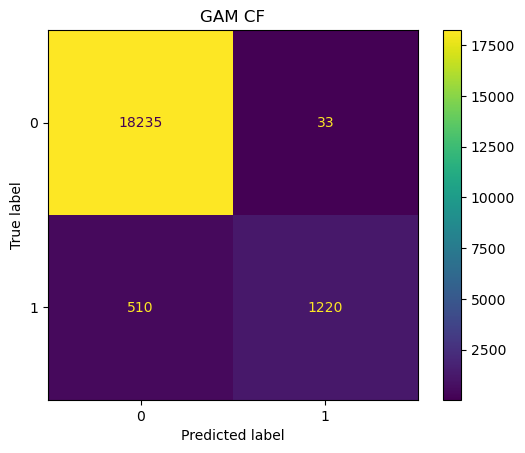

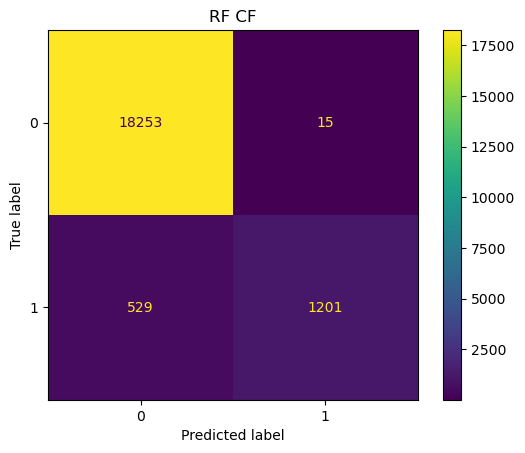

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cf_gam = confusion_matrix(ytest,pred)
cf_rf = confusion_matrix(ytest,pred_rf)
disp_gam = ConfusionMatrixDisplay(cf_gam)
disp_gam.plot()
plt.title('GAM CF');
disp_rf = ConfusionMatrixDisplay(cf_rf)
disp_rf.plot()
plt.title('RF CF');

Confustion matrix shows GAM was slightly better at predicting if a person had diabetes and RF was slightly better at predicting if someone didn't have diabetes. Overall GAM mariginally outperformed RF. Considering how powerful RF models are, this just goes to show how powerful GAM models can be